In [207]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from konlpy.tag import Twitter
twt = Twitter()
from hanspell import spell_checker
import re
from konlpy.tag import Okt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Kkma
from sklearn.linear_model import Lasso
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import tensorflow as tf
import os
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_absolute_error, mean_squared_error

D:\programfiles\anaconda3\envs\pythonopencv\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [208]:
df = pd.read_csv('./result/2021-03-10_21-24-03GS플래쉬.csv')
df.head()

,name,ratings,date,helpful,comment,developer_comment
0,박소영,5,2021-03-10,0,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,NaN
1,싫어함걷는것을,1,2021-03-10,0,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음. 결국 구매 포기.,NaN
2,권혁윤,5,2021-03-10,0,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,NaN
3,서승희,5,2021-03-10,0,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,NaN
4,HH Ch,5,2021-03-10,0,잘 쓰고 있어요~신선한 상품이 많아서 좋아요 ㅎㅎ,NaN


In [209]:
df.describe()

,ratings,helpful
count,9779.000000,9779.000000
mean,4.253298,0.615707
std,1.400829,3.247382
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,148.000000


In [210]:
df = df[['date', 'comment', 'ratings']]

In [211]:
df = df.dropna(axis = 0, how = 'any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9747 entries, 0 to 9778
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     9747 non-null   object
 1   comment  9747 non-null   object
 2   ratings  9747 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 304.6+ KB


In [212]:
# for i in range(len(df)) :
#     result = spell_checker.check(df['comment'][i])
#     a= result[1]
#     df['comment'][i] = a

In [213]:
df['comment']

0       설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...
1                장바구니에 상품을 담았는데 장바구니에서 보이지가 않음. 결국 구매 포기.
2                            사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요
3                          쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.
4                             잘 쓰고 있어요~신선한 상품이 많아서 좋아요 ㅎㅎ
                              ...                        
9772        가동하려면 뭔가 알수없는 메시지를 내며 죽어버림.. 테스트도 제대로 안하고 올린듯
9774                                     쇼핑몰앱 중 훌륭한 편입니다.
9775                                   너무좋네요!!!! 정말저렴하네!!
9776    쿠폰도 많이 주는것같고 수퍼마켓에서도 편하게 쇼핑할수있을것같네요 앞으로 많은 기대할께요ㅎ
9778                        드디어 GS아이수퍼 앱이 출시되었군요.편리하네요~^^
Name: comment, Length: 9747, dtype: object

In [214]:
def text_cleaning(text):
    hangul = re.compile('[|ㄱ-ㅎ|ㅏ-ㅣ]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [215]:
# def text_cleaning2(text):
#     hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
#     result = hangul.sub('', text)
#     return result

In [216]:
df['ko_text'] = df['comment'].apply(lambda x: text_cleaning(x))
df.head()

,date,comment,ratings,ko_text
0,2021-03-10,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,5,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...
1,2021-03-10,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음. 결국 구매 포기.,1,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음 결국 구매 포기
2,2021-03-10,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,5,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요
3,2021-03-10,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,5,쿠폰에 빠른배송 언제까지나 함께합니다
4,2021-03-10,잘 쓰고 있어요~신선한 상품이 많아서 좋아요 ㅎㅎ,5,잘 쓰고 있어요신선한 상품이 많아서 좋아요 ㅎㅎ


In [217]:
# df['ko_text'] = df['ko_text'].apply(lambda x: text_cleaning2(x))
# df.head()

In [218]:
df['ko_text']

0       설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...
1                  장바구니에 상품을 담았는데 장바구니에서 보이지가 않음 결국 구매 포기
2                            사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요
3                                  쿠폰에 빠른배송   언제까지나 함께합니다
4                              잘 쓰고 있어요신선한 상품이 많아서 좋아요 ㅎㅎ
                              ...                        
9772          가동하려면 뭔가 알수없는 메시지를 내며 죽어버림 테스트도 제대로 안하고 올린듯
9774                                      쇼핑몰앱 중 훌륭한 편입니다
9775                                         너무좋네요 정말저렴하네
9776    쿠폰도 많이 주는것같고 수퍼마켓에서도 편하게 쇼핑할수있을것같네요 앞으로 많은 기대할께요ㅎ
9778                              드디어 아이수퍼 앱이 출시되었군요편리하네요
Name: ko_text, Length: 9747, dtype: object

In [219]:
df.describe()

,ratings
count,9747.000000
mean,4.255668
std,1.398413
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [220]:
df = df.reset_index()
del df['index']

In [221]:
# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "./korean_stopwords3.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Kkma()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [222]:
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
for i in range(len(df)):
    if not df['nouns'][i]:
        df.drop([i],inplace=True)
        
df.reset_index(inplace=True)
del df['index']
print(df.shape)
df.head()

(6813, 5)


,date,comment,ratings,ko_text,nouns
0,2021-03-10,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,5,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,[불편]
1,2021-03-10,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음. 결국 구매 포기.,1,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음 결국 구매 포기,[상품]
2,2021-03-10,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,5,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,"[편리, 할인]"
3,2021-03-10,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,5,쿠폰에 빠른배송 언제까지나 함께합니다,"[쿠폰, 배송]"
4,2021-03-10,잘 쓰고 있어요~신선한 상품이 많아서 좋아요 ㅎㅎ,5,잘 쓰고 있어요신선한 상품이 많아서 좋아요 ㅎㅎ,[상품]


In [223]:
all_words = []
satisfaction= []
for i in range(len(df)):
    words = df['nouns'][i]
    words_arr = []
    for n in words:
        words_arr.append(n)
        satisfaction.append(df['ratings'].iloc[i])
    all_words.extend(words_arr)
    
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()        
    

,words,satisfaction,count
0,불편,5,1
1,상품,1,1
2,편리,5,1
3,할인,5,1
4,쿠폰,5,1


In [224]:
words_satisfaction = all_words_df.groupby('words').mean()['satisfaction']
words_count = all_words_df.groupby('words').sum()['count']
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.head()

,satisfaction,count
words,,
ㅎ감사,5.000000,1
가격,4.735577,416
가격대,4.666667,3
가격대비,4.923077,13
가격만족,5.000000,1


In [225]:
words_df = words_df.loc[words_df['count']>=3]
words_df.sort_values('satisfaction', ascending=False)

,satisfaction,count
words,,
휴일,5.0,3
순식간,5.0,3
식비,5.0,3
당일날,5.0,3
식자,5.0,3
...,...,...
정신건강,1.0,4
메인페이지,1.0,3
정상적,1.0,4


In [226]:
words_df.sort_values('count')

,satisfaction,count
words,,
휴일,5.000000,3
배송시,4.666667,3
재주문,4.333333,3
배송시간선택,3.666667,3
배송시스템,5.000000,3
...,...,...
쿠폰,4.269865,667
할인,4.646266,964
편리,4.808071,1016


In [227]:
all_words_df = pd.DataFrame()

for n in range(len(df)):
    words = df['nouns'][n]
    words_df = pd.DataFrame()
    for i in words:
        words_df[i] = [1]
        #satisfaction.append(df['ratings'].iloc[i])
    all_words_df = pd.concat([all_words_df, words_df], ignore_index=True)
    
all_words_df.head()   
    

,불편,상품,편리,할인,쿠폰,배송,특가,행사기획상품쿠폰,실질적,요구,...,됫으,내꺼,작전,휴대폰인증실패,제이,우체국,우체국카드,결제처리중,주문정보,쇼셜
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
all_words_df = all_words_df.fillna(0)
all_words_df.head()

,불편,상품,편리,할인,쿠폰,배송,특가,행사기획상품쿠폰,실질적,요구,...,됫으,내꺼,작전,휴대폰인증실패,제이,우체국,우체국카드,결제처리중,주문정보,쇼셜
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
korean_stopwords_path = "./korean_stopwords3.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
nouns_tagger =Kkma()
def text_cleaning(text):
    hangul = re.compile('[|ㄱ-ㅎ|ㅏ-ㅣ]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    tagger = Kkma()
    nouns = nouns_tagger.nouns(result)
    nouns = [x for x in nouns if len(x) >1]
    nouns =[x for x in nouns if x not in stopwords]
    return nouns

vect = CountVectorizer(tokenizer= lambda x : text_cleaning(x))
bow_vect = vect.fit_transform(df['comment'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [230]:
word_list

['ㅎ감사',
 '가격',
 '가격대',
 '가격대비',
 '가격만족',
 '가격비교',
 '가격선',
 '가격설명',
 '가격세일',
 '가격할인',
 '가격할인행사',
 '가공식품',
 '가능성',
 '가능지역',
 '가독성',
 '가동',
 '가락',
 '가로',
 '가방',
 '가보',
 '가성비',
 '가성비가',
 '가성비품',
 '가입불가',
 '가전제품',
 '가점',
 '가정',
 '가정경제',
 '가족간',
 '가족건강',
 '가족단위',
 '가지가지',
 '가지기',
 '가지도',
 '가지정도',
 '가타',
 '가하',
 '각도',
 '각성',
 '각종등급쿠폰',
 '각종오류',
 '각종쿠폰',
 '각종쿠폰장도',
 '각종할인',
 '각종할인혜택',
 '간가요',
 '간격',
 '간도',
 '간편',
 '간편가입',
 '간편가입이후',
 '간편간식',
 '간편결제',
 '간편다양',
 '간편로그인도',
 '간편로그인은',
 '간편성',
 '간편쇼핑',
 '간편식',
 '간편야채',
 '간편요리',
 '간편인증',
 '간편주문',
 '간편해',
 '간혈적',
 '갈게',
 '갈래',
 '갈비',
 '갈아타야겠네',
 '갈아타야겠어',
 '감격',
 '감귤',
 '감동감동',
 '감동해',
 '감바스알하이',
 '감사여',
 '감사합',
 '감사합니다앱',
 '감소',
 '감솨',
 '감시',
 '감이',
 '감자',
 '감점',
 '갑인',
 '갑자',
 '갑자기말',
 '갑자기지점',
 '갔어도',
 '강력',
 '강력추천',
 '강제로',
 '강제종료되버려',
 '강추',
 '강추합',
 '강츄해',
 '강화',
 '같으네',
 '개가격',
 '개극',
 '개똥',
 '개미지옥',
 '개발건',
 '개발관리',
 '개발팀',
 '개버벅임',
 '개변',
 '개별',
 '개별품옥',
 '개보고',
 '개불편ㅠ',
 '개빡치',
 '개빡칩니',
 '개사고',
 '개사기',
 '개선기대',
 '개선되야할것같네',
 '개선됬으',
 '개선부탁드

In [231]:
count_list

array([  1, 416,   3, ...,   1,   1,   1], dtype=int64)

In [232]:
bow_vect.shape

(6813, 6188)

In [233]:
word_count_dict = dict(zip(word_list, count_list))
print(str(word_count_dict)[:100])

{'ㅎ감사': 1, '가격': 416, '가격대': 3, '가격대비': 13, '가격만족': 1, '가격비교': 7, '가격선': 1, '가격설명': 1, '가격세일': 1, '가


In [234]:
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [235]:
print(tf_idf_vect[0])

  (0, 2125)	1.0


In [236]:
invert_index_vectorizer = {v:k for k,v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100])

{2125: '불편', 2357: '상품', 5488: '편리', 5788: '할인', 5199: '쿠폰', 1796: '배송', 5385: '특가', 5948: '행사기획상품쿠폰


In [237]:
df.sample(10).head()

,date,comment,ratings,ko_text,nouns
1202,2020-06-30,금액대별 사은품이 정말 최고에요,5,금액대별 사은품이 정말 최고에요,"[금액대별, 사은품]"
5919,2018-08-09,검색도 편리하고 상품도 다양하고 자주 이용할게요,5,검색도 편리하고 상품도 다양하고 자주 이용할게요,"[편리, 상품, 다양]"
5576,2018-09-11,새벽배송.. 안양권은 언제쯤 활성화될까요? 그날만을 기다리고있습니다. 영자님들 분발...,5,새벽배송 안양권은 언제쯤 활성화될까요 그날만을 기다리고있습니다 영자님들 분발해주세요...,"[새벽, 새벽배송, 배송, 안양, 언제쯤, 활성화, 분발해, 발해, 아자, 아자아자]"
6150,2017-12-26,기기호환이 안되서 업글 안된다는데 왜이래요? 노트2 사용자인데요,1,기기호환이 안되서 업글 안된다는데 왜이래요 노트 사용자인데요,[기기호환]
2070,2020-03-31,찾아보기좋게 정리가잘되있네요 행사상품안내도 좋았어요,5,찾아보기좋게 정리가잘되있네요 행사상품안내도 좋았어요,"[행사상품안내, 상품]"


<AxesSubplot:>

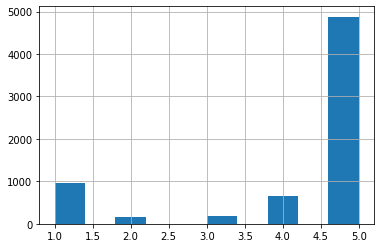

In [238]:
df.ratings.hist()

In [239]:
def rating_to_label(rating) :
  if rating >3:
    return 1
  else:
    return 0
df['y'] = df['ratings'].apply(lambda x : rating_to_label(x))

In [240]:
df

,date,comment,ratings,ko_text,nouns,y
0,2021-03-10,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,5,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,[불편],1
1,2021-03-10,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음. 결국 구매 포기.,1,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음 결국 구매 포기,[상품],0
2,2021-03-10,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,5,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,"[편리, 할인]",1
3,2021-03-10,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,5,쿠폰에 빠른배송 언제까지나 함께합니다,"[쿠폰, 배송]",1
4,2021-03-10,잘 쓰고 있어요~신선한 상품이 많아서 좋아요 ㅎㅎ,5,잘 쓰고 있어요신선한 상품이 많아서 좋아요 ㅎㅎ,[상품],1
...,...,...,...,...,...,...
6808,2014-02-20,편리하고 좋네요 최고어플입니다...gsisuper 애용자로써 무척반가운어플이네요....,5,편리하고 좋네요 최고어플입니다 애용자로써 무척반가운어플이네요,[편리],1
6809,2014-02-19,가동하려면 뭔가 알수없는 메시지를 내며 죽어버림.. 테스트도 제대로 안하고 올린듯,1,가동하려면 뭔가 알수없는 메시지를 내며 죽어버림 테스트도 제대로 안하고 올린듯,[가동],0
6810,2014-02-19,쇼핑몰앱 중 훌륭한 편입니다.,5,쇼핑몰앱 중 훌륭한 편입니다,[쇼핑몰앱],1
6811,2014-02-19,쿠폰도 많이 주는것같고 수퍼마켓에서도 편하게 쇼핑할수있을것같네요 앞으로 많은 기대할께요ㅎ,5,쿠폰도 많이 주는것같고 수퍼마켓에서도 편하게 쇼핑할수있을것같네요 앞으로 많은 기대할께요ㅎ,[쿠폰],1


In [241]:
df.y.value_counts()

1    5526
0    1287
Name: y, dtype: int64

In [242]:
y= df['y']
X_train,X_test, y_train, y_test = train_test_split(tf_idf_vect, y, test_size = 0.2)

In [243]:
print(X_test.shape)

(1363, 6188)


# 여기까지 

# 로지스틱 회귀

In [244]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 81.8%


In [245]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.54      0.11      0.18       252
           1       0.83      0.98      0.90      1111

    accuracy                           0.82      1363
   macro avg       0.68      0.54      0.54      1363
weighted avg       0.78      0.82      0.77      1363



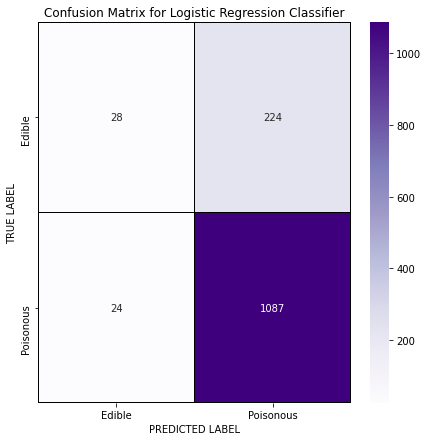

In [246]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

<BarContainer object of 6188 artists>

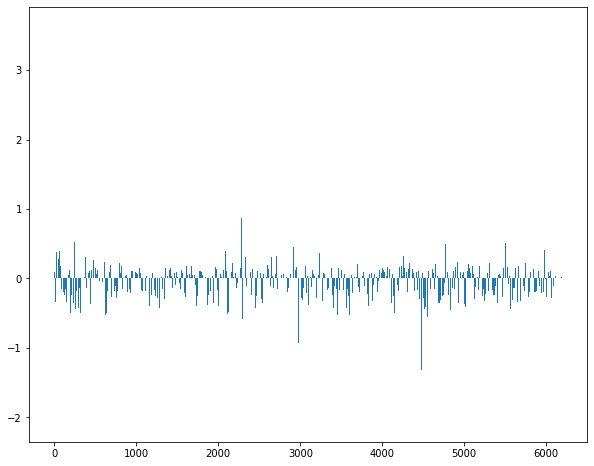

In [247]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [248]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(lr.coef_[0])), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse= False)

In [249]:
for coef in coef_pos_index[:100]:
  print(invert_index_vectorizer[coef[1]], coef[0])

편리 3.624767865777793
심플리 3.4745473051858156
다양 3.172062288722053
신선 3.0476048407058927
배송 3.041570911802535
할인 2.836547245344054
가격 2.4959278727517606
상품 2.424671375274524
유용 2.3885031287366796
특가 2.0468488563622795
포장 2.0222065371490174
이벤트 2.005315786415242
간편 2.0012208778703586
혜택 1.9162506214186834
배송도 1.9133277419521983
강추 1.700546526979902
품질 1.6645032046973447
제품 1.6623315983282811
정확 1.5786282206677171
세일 1.5778068807429035
배달 1.4517646245767166
퀄리티 1.138533964743575
신속 1.1301022207403815
할인율 1.128658644416168
새벽배송 1.092745476792771
실속 1.0379788458019314
당일 0.9731467336497555
시간절약 0.9653148010894411
편리해 0.9313866193023228
편리함 0.8744589469388506
사은품 0.8625957054909704
할인상품 0.8523583832893826
할인행사 0.8357160296176784
신선도 0.817868583834886
배송지역 0.8026965187648892
소량 0.7380699076375199
최적화 0.6967476398736476
행사상품 0.6724892373493951
사실 0.6716032440616598
예약 0.6086286209217592
할인품목 0.6074379779928168
이용중이 0.60208820622272
세일품목 0.5800235919349239
행사제품 0.5717011844796811
편의성 0.559828852

In [250]:
for coef in coef_neg_index[:100]:
  print(invert_index_vectorizer[coef[1]], coef[0])

회원가입 -2.0685266537389424
정회원 -1.3173013520724635
기획전 -1.2650766600873222
장사 -1.1022687937592957
업댓 -1.1021378819505285
정상적 -1.0662471465315573
주문량 -0.9989770575801347
환불 -0.9916268902020229
실행안됨 -0.9283215912695092
작고 -0.9096939085089635
간편가입 -0.8959032903094593
간편인증 -0.861831980382077
임시비번 -0.8445071470446647
예기 -0.8428063821578528
초기화 -0.8428063821578528
단계 -0.8301074799586274
로긴도 -0.8281459053500884
예약배송 -0.8214271909111092
홈페이지 -0.804399779524234
무한반복 -0.7925496635929097
메인페이지 -0.7922429283050685
이드 -0.7616335907317243
제기 -0.7546134945209847
로그인불가 -0.7507520744299393
갯수 -0.7506553763821006
택배포함 -0.7489937098252005
인은 -0.7482314253294337
답변 -0.7474160487130554
반성 -0.7414418808962285
쇼핑포기 -0.7397854026743576
전단 -0.7362535825512616
버그 -0.7317414724981101
뭐죠 -0.7295398485025475
앱실행 -0.727811223464421
마감세일 -0.7269700229045504
예전앱 -0.7231298762773342
나아 -0.7201525973333623
다양안 -0.7186912516019878
변환주소 -0.7177090763838279
탈퇴 -0.716862995696313
하다하다 -0.7158133287463564
오류발생 -0.712331346002

# 의사결정

In [251]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [252]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.56      0.38      0.45       252
           1       0.87      0.93      0.90      1111

    accuracy                           0.83      1363
   macro avg       0.71      0.65      0.67      1363
weighted avg       0.81      0.83      0.82      1363

Test Accuracy: 82.91%


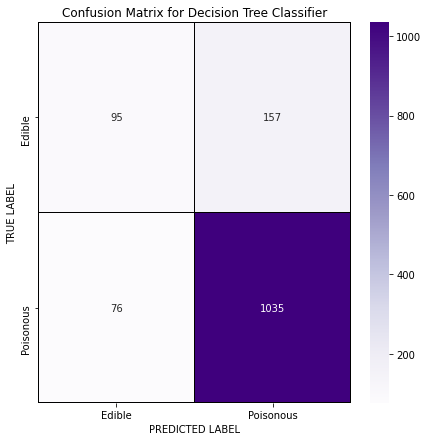

In [253]:
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

<BarContainer object of 6188 artists>

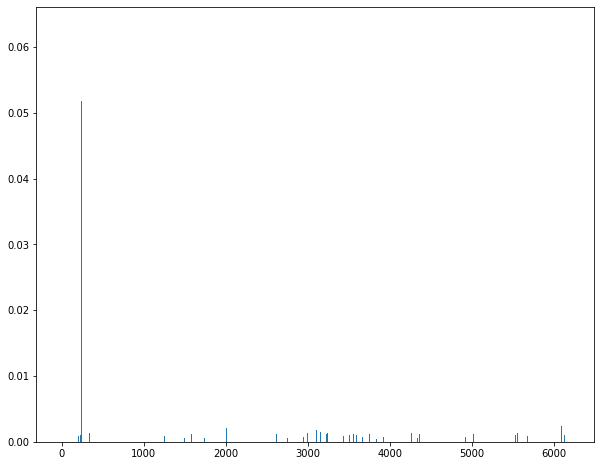

In [254]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(dt.feature_importances_)), dt.feature_importances_)

In [255]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(dt.feature_importances_)), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(dt.feature_importances_)), reverse= False)

In [256]:
for coef in coef_pos_index[:100]:
  print(invert_index_vectorizer[coef[1]])

오류
회원가입
결제
불편
배송
상품
편리
할인
가격
다양
혜택
이벤트
쿠폰
제품
심플리
세일
신선
배달
간편
당일
유용
포장
상태
천원
배송도
특가
무료배송
쿠폰적용
기획전
품질
할인율
정보
준비
강추
만원이상
의아
특가할인
개선필요
새벽
환불
인터넷
사용도중
보기
정확
쇼핑앱
결제방법
수량
예약
기종
제폰
정상적
반영
안드로이드
웹뷰
새벽배송
창도
결재
연락
알람
편의
정회원
변환주소
인증번호
회원가입실패
구경
발급
임시비번
통합회원
됬으
왔더
슈퍼마켓
요새
배달상황
배송비가
배송시간선택
짱짱임
서울전지역
장바구니상품
핸펀사양
문제신선도
다운로드시
고려
프레시꺼
달동안
매장가격
민망
적립금
비번구성
이내
불량
반품
엉터리
앱에
배송지주소설
일요일
마트배달
결재진행
다양안
폰문제
왜케


In [257]:
for coef in coef_neg_index[:100]:
  print(invert_index_vectorizer[coef[1]])

ㅎ감사
가격대
가격대비
가격만족
가격비교
가격선
가격설명
가격세일
가격할인
가격할인행사
가공식품
가능성
가능지역
가락
가로
가방
가보
가성비
가성비가
가성비품
가전제품
가점
가정
가정경제
가족간
가족건강
가족단위
가지가지
가지기
가지도
가지정도
가타
가하
각도
각성
각종등급쿠폰
각종오류
각종쿠폰
각종쿠폰장도
각종할인
각종할인혜택
간가요
간격
간도
간편가입이후
간편간식
간편결제
간편다양
간편로그인은
간편성
간편쇼핑
간편식
간편야채
간편인증
간편주문
간편해
간혈적
갈게
갈래
갈비
갈아타야겠어
감격
감귤
감동감동
감동해
감바스알하이
감사여
감사합
감사합니다앱
감솨
감시
감이
감자
감점
갑인
갑자
갑자기말
갑자기지점
갔어도
강력
강력추천
강제로
강제종료되버려
강추합
강츄해
강화
같으네
개가격
개똥
개미지옥
개발건
개발관리
개발팀
개버벅임
개변
개별
개별품옥
개보고
개불편ㅠ
개빡치


# KNN

In [258]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 95.6%


In [259]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))


KNN Classifier report: 

               precision    recall  f1-score   support

           0       0.67      0.18      0.28       252
           1       0.84      0.98      0.90      1111

    accuracy                           0.83      1363
   macro avg       0.76      0.58      0.59      1363
weighted avg       0.81      0.83      0.79      1363



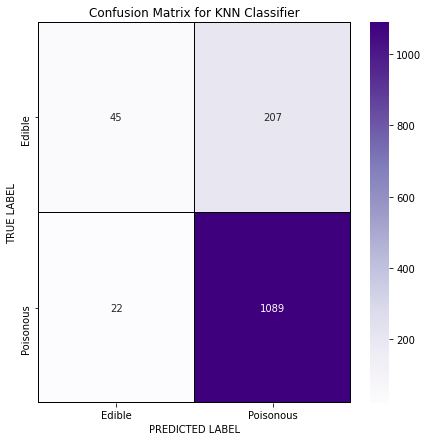

In [260]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# svm

In [261]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))


Test Accuracy: 81.51%


In [262]:
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       252
           1       0.82      1.00      0.90      1111

    accuracy                           0.82      1363
   macro avg       0.41      0.50      0.45      1363
weighted avg       0.66      0.82      0.73      1363



D:\programfiles\anaconda3\envs\pythonopencv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


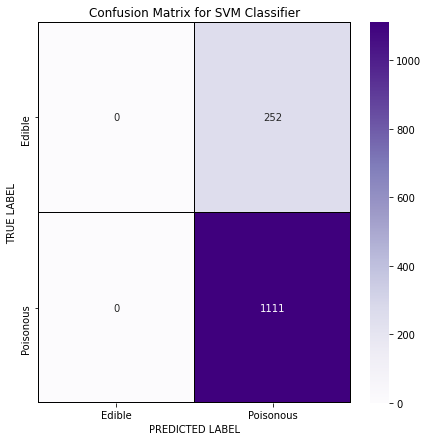

In [263]:
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# 랜덤포레스트

In [264]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 85.11%


In [265]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.75      0.29      0.42       252
           1       0.86      0.98      0.91      1111

    accuracy                           0.85      1363
   macro avg       0.80      0.64      0.67      1363
weighted avg       0.84      0.85      0.82      1363



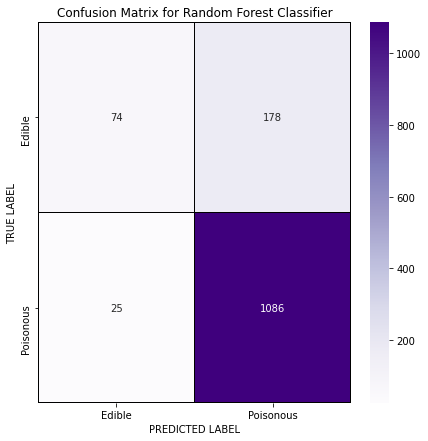

In [266]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

<BarContainer object of 6188 artists>

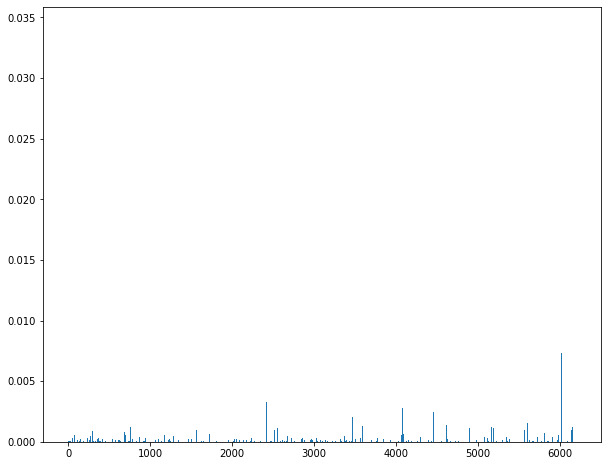

In [267]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)

In [268]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(rf.feature_importances_)), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(rf.feature_importances_)), reverse= False)

In [269]:
for coef in coef_pos_index[:100]:
  print(invert_index_vectorizer[coef[1]], coef[0])

회원가입 0.03415850255259498
오류 0.03218380347822486
편리 0.03170942068204605
배송 0.030019194109472767
불편 0.02532086904660892
결제 0.02530797397402377
상품 0.02038522673649736
할인 0.01690891277472229
다양 0.010994026523736074
가격 0.010536857124471406
쿠폰 0.010151305888560396
신선 0.008522958370644597
세일 0.00818688015672224
제품 0.007975673072997487
심플리 0.007742768160700269
이벤트 0.007592048224194011
혜택 0.007286412692634112
정보 0.0065752478602849815
간편 0.005641052171540427
유용 0.005570275460747183
기획전 0.0040616223673552105
배달 0.003979473644720442
상태 0.003881722874818147
당일 0.0036710841344896362
새벽 0.0033139033879556333
결재 0.0031418347093102195
인터넷 0.0027910197815106054
포장 0.0027222234287515167
버그 0.002666325137525771
답변 0.0026198520778412514
홈페이지 0.0025796620084208993
최신 0.002569345220537462
업댓 0.0025095416008783793
장사 0.0024875870419854736
정상적 0.0024749995974943217
작고 0.002196864700703272
기종 0.002147932197601697
정회원 0.002130259430841723
환불 0.0020824222144001227
보기 0.002040376276270901
연락 0.0020388892223327576


In [270]:
for coef in coef_neg_index[:100]:
  print(invert_index_vectorizer[coef[1]])

가격설명
가공식품
가락
가점
가족간
가지가지
각종쿠폰
각종쿠폰장도
간혈적
감격
감동감동
감시
감점
강제종료되버려
강추합
강츄해
개똥
개변
개사기
개의
개인개발자
개인적인
거래수퍼
건강조심
건사
건지
걸레
검색내용
검색버튼
검색하키
검색한번하면
검정
결제사항
결제실패
결제한
결품발생시
경쟁사
계기
계속써야겠네
계약
계좌이체결제
고객문
고객문의사항
고객요청
고고하세
고기냄새
고기도
고기주문
고등어삿어
고려안
고용
고정
공유
과일가게
과일야채
과일정육
과자품목
관여
괸찮아
교육
교죠
구글
구리
구매금액
구매라
구매목록
구버전
구별
구석
구석구석
구입해야겠네
군산
군산이사
규모
그게
그렇드라구
그뤠잇해
극대화
극악
극칭찬
근처마트
금새
금일
금일배송
금주
금주추천상품
급노화
기간동안이용
기대중
기아
기입하래
기저귀할인
기초
기해라
기회전
기획자
기획품목
김포
까네
깻잎


# 라쏘

In [271]:
alpha = 0.00001
lasso = Lasso(alpha=alpha,random_state=42)
lasso.fit(X_train, y_train)
print("X_train,y_train Accuracy: {}%".format(round(lasso.score(X_train, y_train)*100, 2)))
print("X_test,y_test Accuracy: {}%".format(round(lasso.score(X_test, y_test)*100, 2)))
pred = lasso.predict(X_test)
print(f"lasso alpha{alpha} y_test,pred Mse",mean_absolute_error(y_test, pred))
print(f"lasso alpha{alpha} y_test,pred SQRT Mse",np.sqrt(mean_squared_error(y_test, pred)))

X_train,y_train Accuracy: 75.54%
X_test,y_test Accuracy: 0.12%
lasso alpha1e-05 y_test,pred Mse 0.21898258973086512
lasso alpha1e-05 y_test,pred SQRT Mse 0.3879786931133058
